# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [17]:
df.rename({
    'GRADES_PK_G':'PREK',
    'GRADES_KG_G':'KINDER',
    'GRADES_4_G':'4',
    'GRADES_8_G':'8',
    'GRADES_12_G':'12',
    'GRADES_1_8_G':'PRIMARY',
    'GRADES_9_12_G':'HS',
    'GRADES_ALL_G':'ALL',
    'ENROLL':'ALL_EST'
    },
    axis=1,inplace=True)

In [69]:
df.groupby("YEAR")["AVG_MATH_4_SCORE"].sum()

YEAR
1986        0.0
1987        0.0
1988        0.0
1989        0.0
1990      213.0
1991        0.0
1992     9392.0
1993        0.0
1994        0.0
1995        0.0
1996      224.0
1997        0.0
1998        0.0
1999        0.0
2000     9631.0
2001        0.0
2002        0.0
2003    12402.0
2004        0.0
2005    12570.0
2006        0.0
2007    12678.0
2008        0.0
2009    12696.0
2010        0.0
2011    12746.0
2012        0.0
2013    12824.0
2014        0.0
2015    12742.0
2016        0.0
2017    12690.0
2019    12717.0
Name: AVG_MATH_4_SCORE, dtype: float64

In [61]:
df.groupby("YEAR")["AVG_MATH_4_SCORE"].apply(lambda x: x.isnull().sum())

YEAR
1986    51
1987    51
1988    51
1989    51
1990    52
1991    51
1992    10
1993    51
1994    53
1995    51
1996    52
1997    51
1998    53
1999    51
2000    10
2001    51
2002    53
2003     0
2004    51
2005     0
2006    51
2007     0
2008    51
2009     0
2010    51
2011     0
2012    51
2013     0
2014    51
2015     0
2016    51
2017     0
2019     0
Name: AVG_MATH_4_SCORE, dtype: int64

In [72]:
df[df["YEAR"]==2000][["STATE","AVG_MATH_4_SCORE"]]

,STATE,AVG_MATH_4_SCORE
408,ALABAMA,217.0
409,ALASKA,NaN
410,ARIZONA,219.0
411,ARKANSAS,216.0
412,CALIFORNIA,213.0
413,COLORADO,NaN
414,CONNECTICUT,234.0
415,DELAWARE,NaN
416,DISTRICT_OF_COLUMBIA,192.0
417,FLORIDA,NaN


In [67]:
df[df["STATE"]=="NATIONAL"][["YEAR","AVG_MATH_4_SCORE"]]

,YEAR,AVG_MATH_4_SCORE
1633,1990,213.0
1635,1992,220.0
1637,1994,NaN
1639,1996,224.0
1641,1998,NaN
1643,2000,226.0
1645,2002,NaN
1647,2003,235.0
1649,2005,238.0
1651,2007,240.0


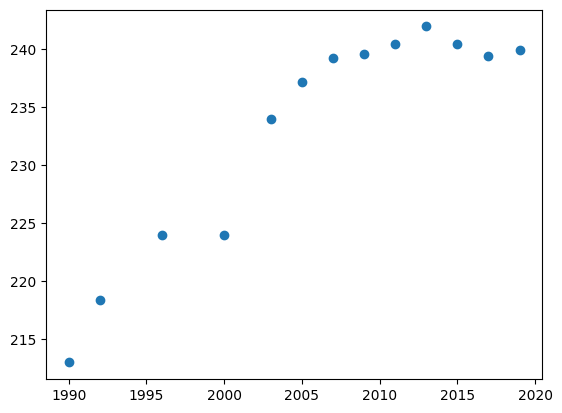

In [53]:
plt.scatter(df.groupby("YEAR")["YEAR"].mean(),df.groupby("YEAR")["AVG_MATH_4_SCORE"].mean())

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [73]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [83]:
print("Michigan:", df[df["STATE"]=="MICHIGAN"]["AVG_MATH_4_SCORE"].mean())
print("Ohio:",df[df["STATE"]=="OHIO"]["AVG_MATH_4_SCORE"].mean())

Michigan: 234.36363636363637
Ohio: 239.45454545454547


Find the average for your outcome score across all states in 2019

In [84]:
df[df["YEAR"]==2019][["STATE","AVG_MATH_4_SCORE"]]

,STATE,AVG_MATH_4_SCORE
1662,ALABAMA,230.0
1663,ALASKA,232.0
1664,ARIZONA,238.0
1665,ARKANSAS,233.0
1666,CALIFORNIA,235.0
1667,COLORADO,242.0
1668,CONNECTICUT,243.0
1669,DELAWARE,239.0
1670,DISTRICT_OF_COLUMBIA,235.0
1671,DODEA,250.0


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [85]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

In [87]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'PREK', 'KINDER', '4', '8', '12',
       'PRIMARY', 'HS', 'ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [88]:
df["Teach exp ratio"]=df["INSTRUCTION_EXPENDITURE"]/df["TOTAL_EXPENDITURE"]
df["exp per student"]=df["TOTAL_EXPENDITURE"]/df["4"]

Feature engineering justification: I am curious to see how the percentage of expenditure that goes to actual instruction impacts math scores of the students. Additionally I believe the amount of money spent in a school per student should have an impact on the performance of the kids so thats what the exp per student is.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_READING_4_SCORE', ylabel='AVG_MATH_4_SCORE'>

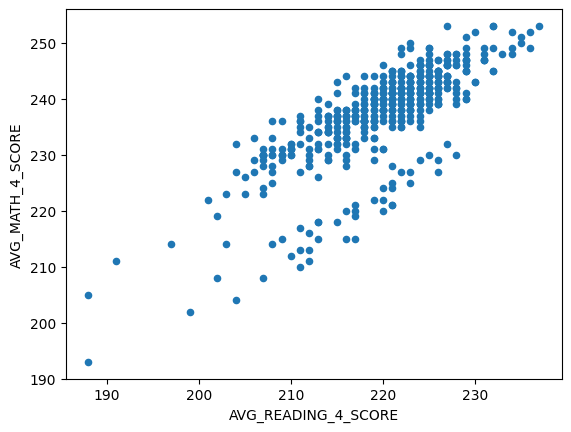

In [91]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE')

There seems to be a pretty clear positive trend between the avg reading score and the avg math score. There is a weird irregularity in the data where there almost seems to be two trends and an empty space in between but this might be due to the lack of more data or different variables that cause the split

**Visualization 2**

<Axes: xlabel='Teach exp ratio', ylabel='AVG_MATH_4_SCORE'>

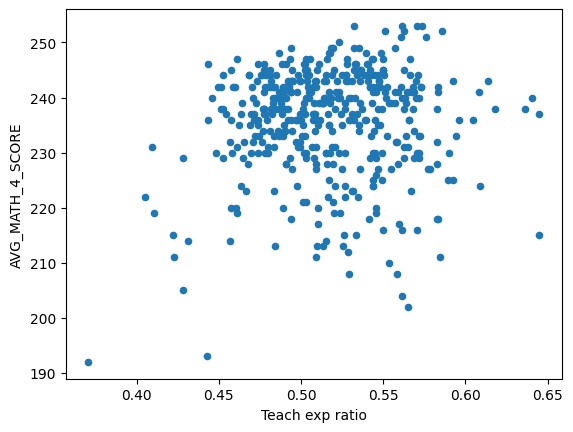

In [92]:
df.plot.scatter(x="Teach exp ratio", y='AVG_MATH_4_SCORE')

There doesn't seem to be any clear trend between the teacher expenditure percentage and the math score. You could barely argue there is a positive trend, but it isn't strong at all.

**Visualization 3**

<Axes: xlabel='exp per student', ylabel='AVG_MATH_4_SCORE'>

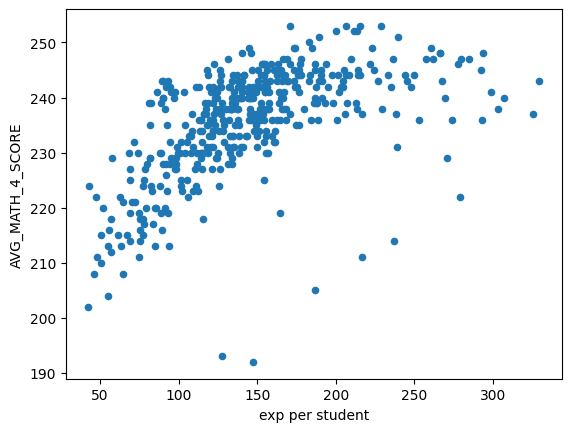

In [93]:
df.plot.scatter(x="exp per student", y='AVG_MATH_4_SCORE')

There is an oddly looking logarithmic correlation between he avg 4 math score and the expenditure per student, but this could just be due to the lack of a larger dat set and it may just be an underlying linear correlation that just appears this way 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [95]:
from sklearn.model_selection import train_test_split

In [99]:
X = df[["Teach exp ratio","exp per student",'AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [102]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [103]:
# create your model here
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [108]:
print("R-squared:",model.score(X_test, y_test))
print("root mean squared error:",np.mean((model.predict(X_test)-y_test)**2)**0.5)

R-squared: 0.34084304498954465
root mean squared error: 7.0316555010595625


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

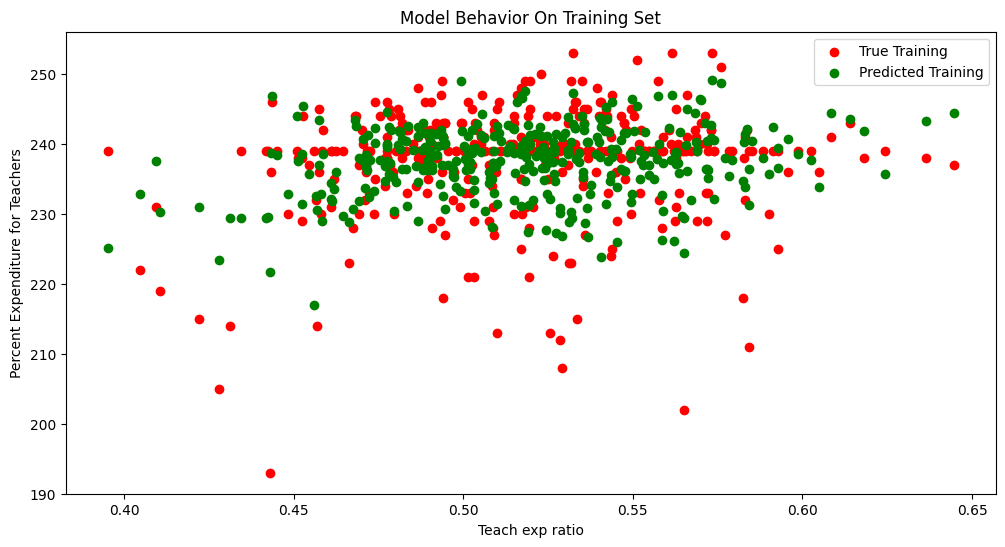

In [109]:
col_name = "Teach exp ratio"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Percent Expenditure for Teachers')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

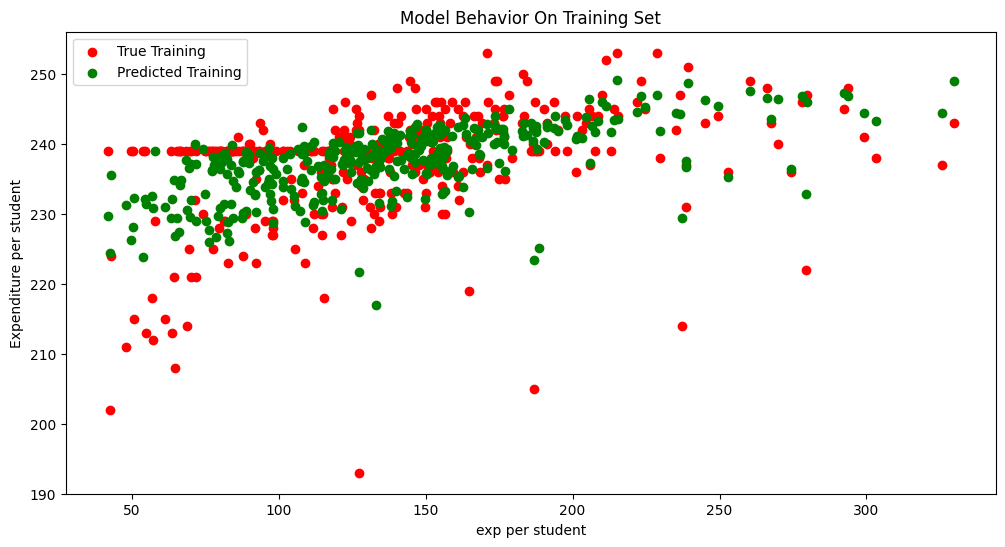

In [111]:
col_name = "exp per student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Expenditure per student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

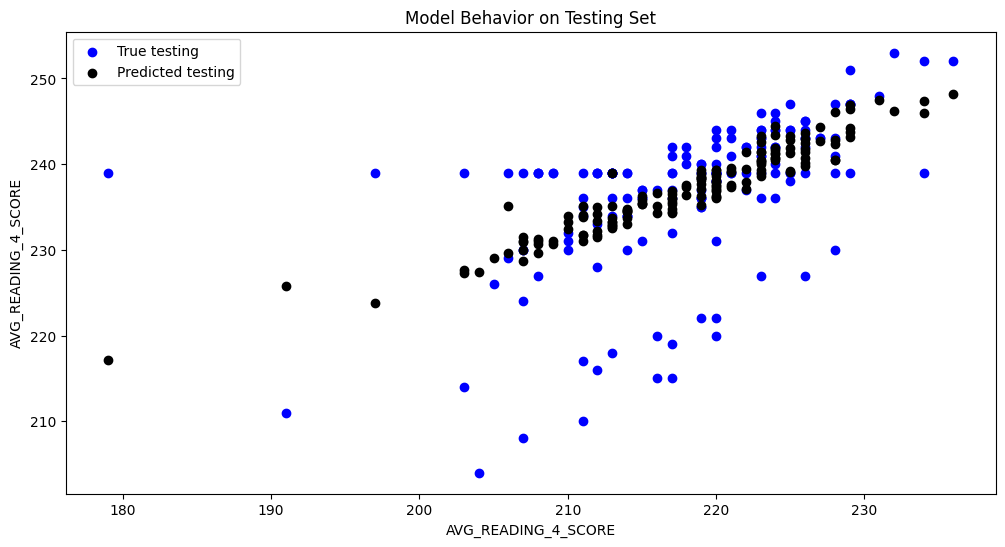

In [110]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I used a linear regression model with Average reading 4 Scores, expenditure per student, and percentage of total expenditure that goes towards instructional needs. It didn't seem like the percentage of total expenditure that goes towards instructional needs was a good predictor of average math scores since the correlation was very weak. Additionally the R-squared metric showed that our model was not a strong predictor of average reading 4 scores and the RSME was very high which also indicated this model was not strong. The other predictors seemed to have a fairly strong correlation with average math 4 scores. When testing the data in the graphs you could notice the actual data was far more spread out then the models predictions. So overall the model worked poorly using those three predictors and did not generally fit the data well.